<a href="https://www.kaggle.com/code/oliviaroseedu/capstone-project-olivia?scriptVersionId=148511452" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Dataset
https://www.kaggle.com/datasets/rhammell/ships-in-satellite-imagery

# Exploratory Data Analysis


Q1: What is the distribution between the classes 'ship' and 'no-ship'?
     Class  Count
0  no-ship   3000
1     ship   1000

Q2: How do the distribution of differently classed ships vary across scenes?
                   Scene ID  no-ship Count  ship Count
0      20150718_184300_090b              4           0
1      20150720_184302_0906              1           0
2      20150830_000650_0b07              3           0
3    20150830_000652_1_0b07              2           1
4      20160622_170157_0c64              6           0
..                      ...            ...         ...
429    20180713_180403_1035             13          12
430    20180714_180352_100e              7           4
431    20180714_180427_1029              4           3
432    20180714_182155_1051              4           2
433    20180714_182329_101d              4           0

[434 rows x 3 columns]

Q3: How do the distribution of pixel values vary between images classed as 'ship' and 'no-ship'?


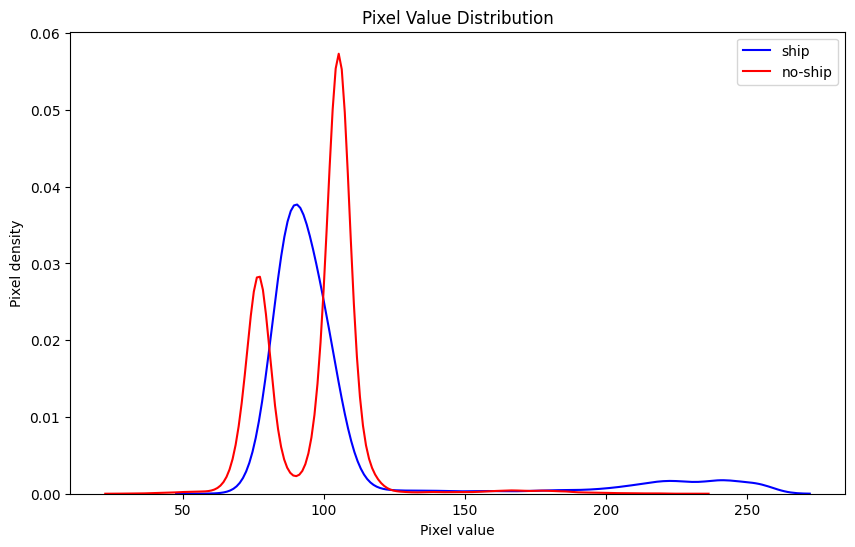


Q4: How do the average distributions of pixel values vary across scenes?
                   Scene ID  Mean Pixel Value
0      20150718_184300_090b        109.606263
1      20150720_184302_0906        150.802448
2      20150830_000650_0b07        110.019931
3    20150830_000652_1_0b07        107.040781
4      20160622_170157_0c64        103.705113
..                      ...               ...
429    20180713_180403_1035         83.841398
430    20180714_180352_100e        118.667159
431    20180714_180427_1029        127.917463
432    20180714_182155_1051        133.358420
433    20180714_182329_101d        111.831445

[434 rows x 2 columns]

Q5: What is the correlation between the presence of ships and certain geographic locations?
      Longitude    Latitude  no-ship Count  ship Count
0     33.629003 -117.969282              1           0
1     33.629598 -117.958938              1           0
2     33.643084 -118.015117              1           0
3     33.654040 -118.115831          

In [1]:
############### FIVE QUESTIONS ###############
question1 = "\nQ1: What is the distribution between the classes 'ship' and 'no-ship'?"
question2 = "\nQ2: How do the distribution of differently classed ships vary across scenes?"
question3 = "\nQ3: How do the distribution of pixel values vary between images classed as 'ship' and 'no-ship'?"
question4 = "\nQ4: How do the average distributions of pixel values vary across scenes?"
question5 = "\nQ5: What is the correlation between the presence of ships and certain geographic locations?"



#################### CODE ####################
# Import libraries
import pandas as pd             #used for data manipulation and analysis
import numpy as np              #used for numerical operations
import matplotlib as mpl        #used to import pyplot
import matplotlib.pyplot as plt #used for plotting
import seaborn as sns           #used for better visualisation

# Load dataset
data = pd.read_json('/kaggle/input/ships-in-satellite-imagery/shipsnet.json') #new dataframe


## Question 1
print(question1)
classDist = data['labels'].replace({0: 'no-ship', 1: 'ship'}).value_counts().reset_index() #count how many are in each class
classDist.columns = ['Class', 'Count'] #column names for visual clarification
print(classDist)


## Question 2
print(question2)

# THE FOLLOWING HAS BEEN SEPERATED SO I CAN ANNOTATE EACH PART
# sceneClassDist = data.groupby(['scene_ids', 'labels']).size().unstack(fill_value=0).reset_index()
sceneClassDist = data.groupby(['scene_ids', 'labels']) #group by scene IDs and labels  
sceneClassDist = sceneClassDist.size() #counts occurances of each combination
sceneClassDist = sceneClassDist.unstack(fill_value=0).reset_index() #makes it into a table

sceneClassDist.columns = ['Scene ID', 'no-ship Count', 'ship Count'] #column names for visual clarity
print(sceneClassDist)


## Question 3
shipPixels = data[data['labels'] == 1]['data'].apply(pd.Series) #get pixel values for ship images
noShipPixels = data[data['labels'] == 0]['data'].apply(pd.Series) #get pixel values for no-ship images

print(question3)
plt.figure(figsize=(10, 6)) #make a figure with size (10,6)
sns.kdeplot(shipPixels.iloc[0], color = 'b', label = 'ship') #KDE plot to show pixel distribution for class 'ship'
sns.kdeplot(noShipPixels.iloc[0], color = 'r', label = 'no-ship') #KDE plot to show pixel distribution for class 'no-ship'
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel value')
plt.ylabel('Pixel density')
plt.legend()
plt.show()


## Question 4
print(question4)

# THE FOLLOWING HAS BEEN SEPERATED SO I CAN ANNOTATE EACH PART
# scenePixelAvg = data.groupby('scene_ids')['data'].apply(lambda x: np.array(x.tolist()).mean()).reset_index()
scenePixelAvg = data.groupby('scene_ids')['data'] #group by scene IDs and labels
scenePixelAvg = scenePixelAvg.apply(lambda x: np.array(x.tolist()).mean()).reset_index() #gets the mean of the number of occurances of each combination

scenePixelAvg.columns = ['Scene ID', 'Mean Pixel Value'] #column names for visual clarity
print(scenePixelAvg)


## Question 5
print(question5)

# Extract the longitude and latitude from the locations column
data['latitude'] = data['locations'].apply(lambda x: x[0]) #lat
data['longitude'] = data['locations'].apply(lambda x: x[1]) #long

# THE FOLLOWING HAS BEEN SEPERATED SO I CAN ANNOTATE EACH PART
# shipPresencebyLocation = data.groupby(['longitude_latitude', 'labels']).size().unstack(fill_value=0).reset_index()
shipPresencebyLocation = data.groupby(['longitude', 'latitude', 'labels']) #group by longitude, latitude, and labels  
shipPresencebyLocation = shipPresencebyLocation.size() #counts occurances of each combination
shipPresencebyLocation = shipPresencebyLocation.unstack(fill_value=0).reset_index() #makes it into a table

shipPresencebyLocation.columns = ['Longitude', 'Latitude', 'no-ship Count', 'ship Count'] #column names for visual clarity
print(shipPresencebyLocation)

# Predictive Data Analytics

In [2]:
# Import libraries
import json                                          #used for reading json files
from sklearn.model_selection import train_test_split #used for testing

# Load the dataset
with open('/kaggle/input/ships-in-satellite-imagery/shipsnet.json') as data_file:
    data = json.load(data_file)

X = data['data'] #pixel values
y = data['labels'] #labels

# Split testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier #used for training
clf = RandomForestClassifier(n_estimators=100, random_state=42) #estimators = 100, random state = 42
clf.fit(X_train, y_train) #train x and y

# Import tools for calculating
from sklearn.metrics import accuracy_score, classification_report #used for producing outputs

# Prediction based off of X_test
y_pred = clf.predict(X_test) #predict

# Calculate
accuracy = accuracy_score(y_test, y_pred) #calculate accuracy
print("Accuracy:", (accuracy*100), "%") #displayed as a percentage

# Print the classification report
print(classification_report(y_test, y_pred)) #print output

Accuracy: 95.75 %
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       591
           1       0.96      0.87      0.91       209

    accuracy                           0.96       800
   macro avg       0.96      0.93      0.94       800
weighted avg       0.96      0.96      0.96       800

